In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# delivery data
delivery_data = pd.read_csv('deliveries.csv')

# IPL match data
match_data = pd.read_csv('matches.csv')

In [3]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
# Stats
biggest_win = match_data['win_by_runs'].max()
print("Biggest Win Margin was " + str(biggest_win) + " runs.")

teams_biggest_win = []

Biggest Win Margin was 144 runs.


In [6]:
# Which game was this biggest win?
biggest_game = match_data.loc[match_data['win_by_runs'] == biggest_win]
biggest_game

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
560,561,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN


In [8]:
teams_biggest_win.append((str(biggest_game['season'].tolist()[0])))
teams_biggest_win.append((str(biggest_game['venue'].tolist()[0])))
teams_biggest_win.append(str(biggest_game['team1'].tolist()[0]))
teams_biggest_win.append(str(biggest_game['team2'].tolist()[0]))
teams_biggest_win.append(str(biggest_game['winner'].tolist()[0]))
teams_biggest_win

['2016',
 'M Chinnaswamy Stadium',
 'Royal Challengers Bangalore',
 'Gujarat Lions',
 'Royal Challengers Bangalore']

In [10]:
tie_matches = match_data.loc[match_data['result'] == 'tie']
tie_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
130,131,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
328,329,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chowdhary,S Ravi,NaN
341,342,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
416,417,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
476,477,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN


In [11]:
# Popular Venues in the IPL
match_data['venue'].value_counts().sort_values(ascending=False)

M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium                                   

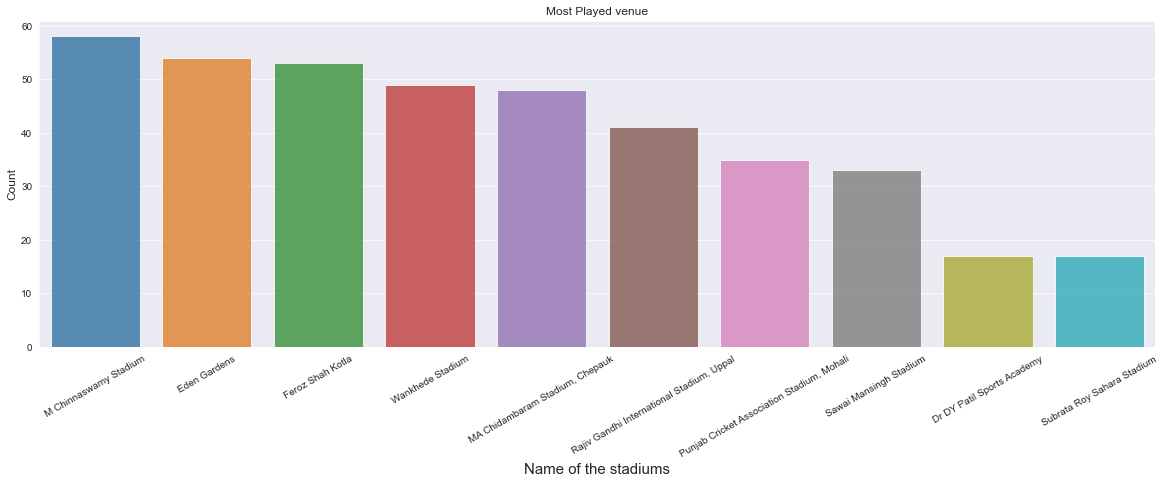

In [14]:
sns.set_style("darkgrid") 
ls = match_data['venue'].value_counts().sort_values(ascending=False)
ls = ls[:10]
plt.figure(figsize=(20, 6))
Most_Played = sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30, labels=ls.index, fontsize=10)
plt.show()

In [15]:
# Match Statistics
# Player with the most 'Man of the Matches'
match_data['player_of_match'].value_counts().head(10)

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
SK Raina          13
RG Sharma         13
G Gambhir         12
AM Rahane         12
MEK Hussey        12
MS Dhoni          12
Name: player_of_match, dtype: int64

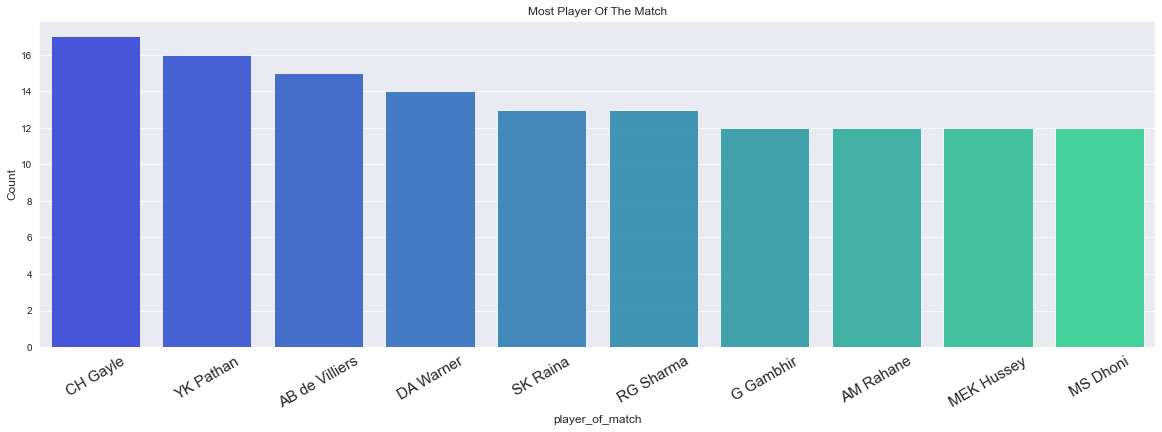

In [16]:
man_of_match = match_data['player_of_match'].value_counts()
man_of_match = man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 6))
man_of_matches = sns.barplot(
    man_of_match.index, man_of_match.values, alpha=0.8, palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(
    rotation=30, labels=man_of_match.index, fontsize=15)
plt.show()

Text(0.5, 0, 'Season')

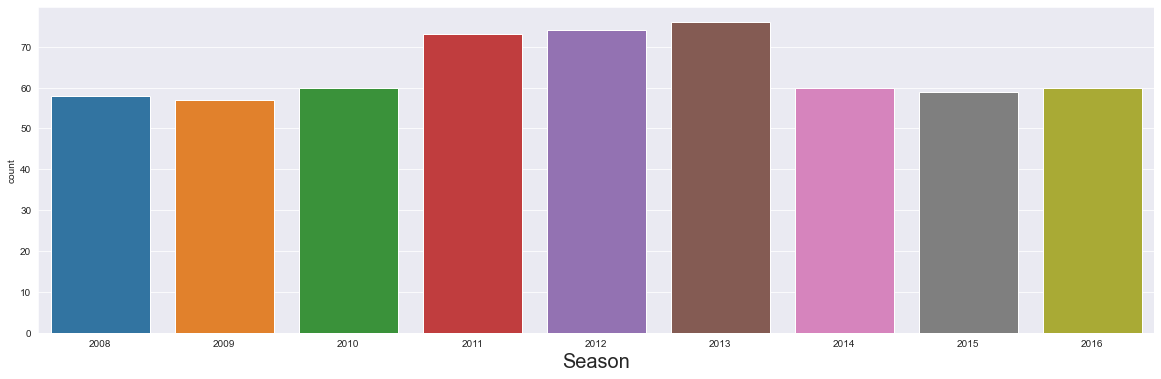

In [17]:
# Matches Played across each season
plt.figure(figsize=(20, 6))
season = sns.countplot(x='season', data=match_data)
plt.xlabel('Season', fontsize=20)

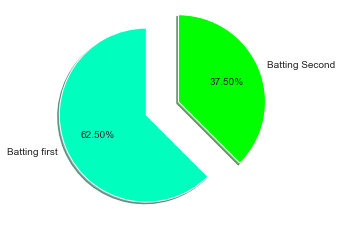

In [18]:
# Stadium Wise Analysis for most played venues
# MA Chidambaram Stadium
Chennai_stadium = match_data.loc[(
    match_data['venue'] == 'MA Chidambaram Stadium, Chepauk')]
# Team batting first has won the most match
Chennai_stadium_win_by_runs = Chennai_stadium[Chennai_stadium['win_by_runs'] > 0]
slices = [len(Chennai_stadium_win_by_runs), len(
    Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels = ['Batting first', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=1, explode=(
    0, 0.4), autopct='%1.2f%%', colors=['#00ffbf', '#00ff00'])
plt.show()

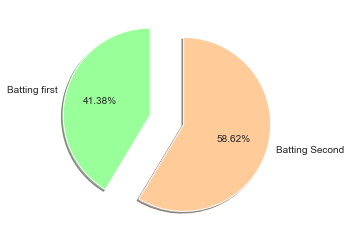

In [21]:
# Chinnaswamy Stadium
M_Chinnaswamy_Stadium = match_data.loc[(
    match_data['venue'] == 'M Chinnaswamy Stadium')]
# Team batting First Has Won the match
M_Chinnaswamy_Stadium_win_by_runs = M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs'] > 0]
slices = [len(M_Chinnaswamy_Stadium_win_by_runs), len(
    M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels = ['Batting first', 'Batting Second']
plt.pie(slices, labels=labels, startangle=90, shadow=1, explode=(
    0, 0.4), autopct='%1.2f%%', colors=['#99ff99', '#ffcc99'])
plt.show()

In [22]:
# Deep Analysis of the Games in 2012
len(match_data[match_data['season'] == 2012])

74

In [23]:
match_2012 = match_data[match_data['season'] == 2012]
print(len(match_2012[match_2012['toss_winner'] == match_2012['winner']]))
match_2012[match_2012['toss_winner'] == match_2012['winner']].head()

33


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
248,249,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
249,250,2012,Kolkata,2012-04-05,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
255,256,2012,Pune,2012-04-08,Pune Warriors,Kings XI Punjab,Pune Warriors,bat,normal,0,Pune Warriors,22,0,MN Samuels,Subrata Roy Sahara Stadium,S Das,SJA Taufel,NaN
258,259,2012,Delhi,2012-04-10,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,M Morkel,Feroz Shah Kotla,Asad Rauf,SK Tarapore,NaN
261,262,2012,Chandigarh,2012-04-12,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,AD Mascarenhas,"Punjab Cricket Association Stadium, Mohali",VA Kulkarni,SK Tarapore,NaN


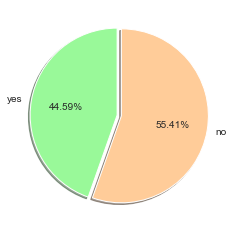

In [27]:
# Do the toss winner also wins the game
match_2012 = match_data[match_data['season'] == 2012]
data = match_2012[match_2012['toss_winner'] == match_2012['winner']]

slices = [len(data), (74-len(data))]
labels = ['yes', 'no']
plt.pie(slices, labels=labels, startangle=90, shadow=True, explode=(
    0, 0.05), autopct='%1.2f%%', colors=['#99f999', '#ffcc99'])
plt.show()

In 2012 if the team won the toss, the chances to win the match is 55.41%

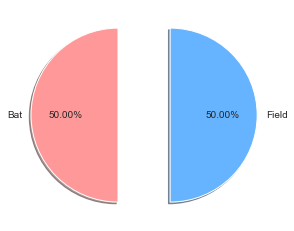

In [29]:
# Trends after winning the toss
data = match_data[(match_data['toss_decision'] == 'field')
                  & (match_data['season'] == 2012)]
labels = ['Bat', 'Field']
slices = [74-len(data), len(data)]
plt.pie(slices, labels=labels, startangle=90, shadow=1, explode=(
    0.2, 0.4), autopct='%1.2f%%', colors=['#ff9999', '#66b3ff'])
plt.show()

Winning team either choose to bat and field are similar

In [30]:
# Team Comparisons
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [31]:
def compare(team1):
    teams = list(match_data.team1.unique())

    # Remove team1
    teams.remove(team1)

    # make a list of all oppenents
    opponents = teams.copy()

    # Collect data from match data where team one played
    mt1 = match_data[((match_data['team1'] == team1) |
                      (match_data['team2'] == team1))]

    for t in opponents:
        mask = (((mt1['team1'] == t) | (mt1['team2'] == t))) & (
            (mt1['team1'] == team1) | (mt1['team2'] == team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

In [33]:
compare('Chennai Super Kings')

        Chennai Super Kings  Kolkata Knight Riders
winner                   10                      6
        Chennai Super Kings  Rajasthan Royals
winner                   11                 6
        Mumbai Indians  Chennai Super Kings
winner              12                   10
        Chennai Super Kings  Deccan Chargers
winner                    6                4
        Chennai Super Kings  Kings XI Punjab
winner                   10                7
        Chennai Super Kings  Royal Challengers Bangalore
winner                   12                            7
        Chennai Super Kings  Delhi Daredevils
winner                   11                 5
        Kochi Tuskers Kerala  Chennai Super Kings
winner                     1                    1
        Chennai Super Kings  Pune Warriors
winner                    4              2
        Chennai Super Kings  Sunrisers Hyderabad
winner                    4                    2
Empty DataFrame
Columns: []
Index: [winner]
Empt

In [34]:
compare('Rajasthan Royals')

        Rajasthan Royals  Kolkata Knight Riders
winner                 9                      6
        Chennai Super Kings  Rajasthan Royals
winner                   11                 6
        Mumbai Indians  Rajasthan Royals
winner              10                 6
        Rajasthan Royals  Deccan Chargers
winner                 7                2
        Rajasthan Royals  Kings XI Punjab
winner                 9                6
        Royal Challengers Bangalore  Rajasthan Royals
winner                            8                 7
        Rajasthan Royals  Delhi Daredevils
winner                10                 6
        Kochi Tuskers Kerala  Rajasthan Royals
winner                     1                 1
        Rajasthan Royals  Pune Warriors
winner                 4              1
        Rajasthan Royals  Sunrisers Hyderabad
winner                 4                    3
Empty DataFrame
Columns: []
Index: [winner]
Empty DataFrame
Columns: []
Index: [winner]
